In [1]:
import pandas as pd
import numpy as np
# from pandas.compat import StringIO, bytes_to_str
# from pandas_datareader import data, wb
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/liuxuan/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('/Users/liuxuan/Desktop/未命名檔案夾 3/Xuan Liu Career/Data/DS Collection 资料/Employee Retention/employee_retention_data.csv')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [635]:
# employee, tenure, dept, yrs of experience

1. create table with 3 columns: day, employee_headcount, company_id
2. employee churn

### 1. Create table with 3 columns: day,  company_id, employee_headcount


In [4]:
# count # of employees by join&quit
df_join = df.groupby(['join_date', 'company_id'])['employee_id'].count().reset_index().rename(columns = {'employee_id':'join_count'})
df_quit = df.groupby(['quit_date', 'company_id'])['employee_id'].count().reset_index().rename(columns = {'employee_id':'quit_count'})

In [5]:
start = datetime.datetime.strptime("2011-01-24", '%Y-%m-%d')
end = datetime.datetime.strptime("2015-12-13", '%Y-%m-%d')
unique_dates = pd.date_range(start, end, freq = 'D')
unique_dates = unique_dates.to_frame(index = False, name = 'unique_dates')
unique_companies = pd.DataFrame(df['company_id'].unique())


In [6]:
unique_dates['unique_dates']

0      2011-01-24
1      2011-01-25
2      2011-01-26
3      2011-01-27
4      2011-01-28
          ...    
1780   2015-12-09
1781   2015-12-10
1782   2015-12-11
1783   2015-12-12
1784   2015-12-13
Name: unique_dates, Length: 1785, dtype: datetime64[ns]

In [7]:
unique_companies

,0
0,7
1,4
2,2
3,9
4,1
5,6
6,10
7,5
8,3
9,8


In [8]:
# Create a DF of all combinations of unique companies & dates
df_headcount = [[0,0]]*unique_dates.shape[0]*unique_companies.shape[0]
L = unique_companies.shape[0]

for j in range(unique_dates.shape[0]):
    for i in range(unique_companies.shape[0]):
        df_headcount[j*L+i] = [unique_dates['unique_dates'][j], unique_companies[0][i]]
df_headcount = pd.DataFrame(df_headcount, columns = ['date', 'company'])
df_headcount

,date,company
0,2011-01-24,7
1,2011-01-24,4
2,2011-01-24,2
3,2011-01-24,9
4,2011-01-24,1
...,...,...
21415,2015-12-13,5
21416,2015-12-13,3
21417,2015-12-13,8
21418,2015-12-13,11


In [468]:
#df_join = df_join.rename(columns = {'employee_id':'join_employee_id'})
#df_quit = df_quit.rename(columns = {'employee_id':'quit_employee_id'})

In [9]:
df_headcount['date'] = df_headcount['date'].astype(str)
df_headcount['date']

0        2011-01-24
1        2011-01-24
2        2011-01-24
3        2011-01-24
4        2011-01-24
            ...    
21415    2015-12-13
21416    2015-12-13
21417    2015-12-13
21418    2015-12-13
21419    2015-12-13
Name: date, Length: 21420, dtype: object

In [10]:
df_join

,join_date,company_id,join_count
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
...,...,...,...
5125,2015-12-09,1,1
5126,2015-12-09,2,2
5127,2015-12-09,3,1
5128,2015-12-10,1,1


In [11]:
df_quit

,quit_date,company_id,quit_count
0,2011-10-13,6,1
1,2011-10-14,10,1
2,2011-10-21,1,1
3,2011-10-28,4,1
4,2011-11-11,1,1
...,...,...,...
2719,2015-12-04,9,4
2720,2015-12-04,10,3
2721,2015-12-08,1,1
2722,2015-12-08,3,1


In [12]:
df_headcount = pd.merge(df_headcount, df_join, left_on = ['date', 'company'], right_on = ['join_date', 'company_id'], how = 'left') #!!! do not forget to change the date format into same type
df_headcount = pd.merge(df_headcount, df_quit, left_on = ['date', 'company'], right_on = ['quit_date', 'company_id'], how = 'left')

In [13]:
# replace NaN with 0

In [14]:
df_headcount['join_count'] = df_headcount['join_count'].fillna(0)

In [15]:
df_headcount['quit_count'] = df_headcount['quit_count'].fillna(0)

In [16]:
df_headcount = pd.merge(df_headcount, df_headcount.groupby(['date', 'company'])['join_count', 'quit_count'].sum().groupby(level = [1]).cumsum().reset_index().rename(columns = {'join_count':'join_cumsum', 'quit_count':'quit_cumsum'}), on = ['date', 'company'])

/Users/liuxuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
df_headcount['count'] = df_headcount['join_cumsum'] - df_headcount['quit_cumsum']
df_headcount_table = df_headcount[['date', 'company', 'count']]
df_headcount_table

,date,company,count
0,2011-01-24,7,1.0
1,2011-01-24,4,12.0
2,2011-01-24,2,17.0
3,2011-01-24,9,3.0
4,2011-01-24,1,25.0
...,...,...,...
21415,2015-12-13,5,772.0
21416,2015-12-13,3,1218.0
21417,2015-12-13,8,468.0
21418,2015-12-13,11,4.0


In [18]:
df['employment_length'] = (pd.to_datetime(df['quit_date'])- pd.to_datetime(df['join_date']))
df['employment_length'] = df['employment_length'].dt.days

/Users/liuxuan/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/liuxuan/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


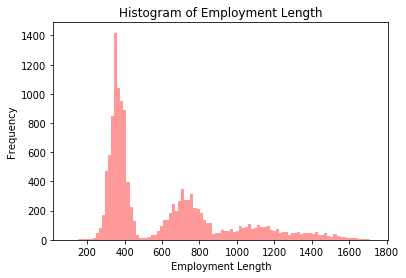

In [19]:
sns.distplot(list(df['employment_length'].values), bins=100, kde=False, color = 'red')
plt.title('Histogram of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.show()

In [20]:
df['week_of_year'] = pd.to_datetime(df['quit_date'][-df['quit_date'].isnull()]).dt.week

/Users/liuxuan/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/liuxuan/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


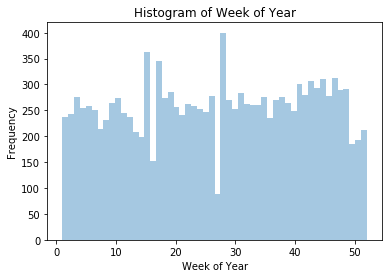

In [21]:
sns.distplot(list(df['week_of_year'].values), bins = 52, kde=False)
plt.title('Histogram of Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Frequency')
plt.show()

### Binary Class

In [94]:
bench_date = datetime.datetime.strftime(datetime.datetime.strptime("2015-12-13", '%Y-%m-%d') - datetime.timedelta(days = 365+31),'%Y-%m-%d')
bench_date

'2014-11-12'

In [95]:
# 'early quitter: we could define early quitters as those people who quit within 1 yr or so
df_binary = df[df['join_date'] < bench_date]

In [96]:
df_binary['early_quitter'] = np.where(((df_binary['quit_date'].isnull()== True) | (df_binary['employment_length'] > 396)), 0, 1)


/Users/liuxuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
df_binary

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length,week_of_year,early_quitter
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,44.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,14.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,NaN,NaN,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,23.0,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,34.0,0
...,...,...,...,...,...,...,...,...,...,...
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,1151.0,26.0,0
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,372.0,5.0,1
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,780.0,43.0,0
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1123.0,2.0,0


### Decision Tree

In [98]:
from sklearn import tree


In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_binary['dept'].astype(str))
df_binary['dept'] = le.transform(df_binary['dept'].astype(str))
    

/Users/liuxuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [100]:
y = df_binary[['early_quitter']]
X = df_binary[["company_id", "dept", "seniority", "salary"]]

In [101]:
features = ["company_id", "dept", "seniority", "salary"]
target = 'early_quitter'

In [102]:
y

,early_quitter
0,0
1,1
2,0
3,1
4,0
...,...
24695,0
24696,1
24699,0
24700,0


In [103]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [104]:
dt = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 3)

In [105]:
dt.fit(X,y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

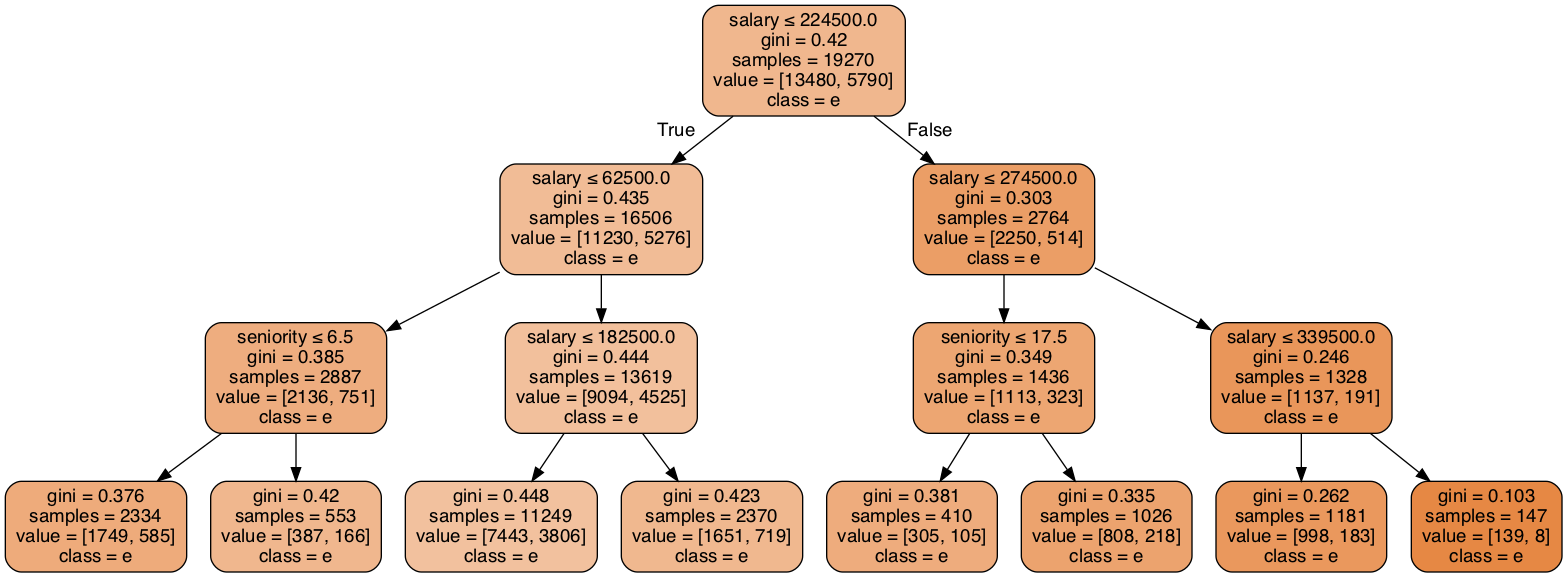

In [106]:
# Decision Tree Visualization
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO() # dot path turn to .png
tree.export_graphviz(dt, 
 out_file=dot_data, 
 class_names=target, # the target names.
 feature_names=features, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

__Salary__ is the top factor for employment followed by seniority, dept and company. It is very interesting that the employees with salary in the range of [62500, 224500] are more likely to be an early quitter. It makes sense that people earns very high salary are more willing to stay and have less opportunity in other companies available; while people make less money might be not easy to change their job.

Then, I'd like to go further about plotting proportion of early quitter by salary percentile.  

##### 50 of salary_quantile

In [148]:

df_binary['salary_quantile'] = pd.cut(df_binary['salary'], bins = df_binary['salary'].quantile(np.arange(0,1,1/50)), labels = np.arange(1,50,1), include_lowest = True).astype(float)

/Users/liuxuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
prop_early_quitter = pd.DataFrame((df_binary[df_binary['early_quitter']==1].groupby('salary_quantile')['early_quitter'].size())/(df_binary.groupby('salary_quantile')['early_quitter'].size())).reset_index()
prop_early_quitter.rename(columns = {'early_quitter':"% of early_quitter"})

df_LB = df_binary['salary'].quantile(np.arange(0,1,1/50)).reset_index().rename(columns = {"index":"bin", "salary":"lower_bound_salary"}).drop(index = 49)
df_LB['bin'] = (df_LB[['bin']]*100/2+1)
prop_early_quitter = prop_early_quitter.merge(df_LB, left_on = "salary_quantile", right_on = "bin", how = 'outer').drop("bin", axis = 1)
prop_early_quitter


,salary_quantile,early_quitter,lower_bound_salary
0,1.0,0.255474,17000.0
1,2.0,0.248120,25000.0
2,3.0,0.298201,30000.0
3,4.0,0.227882,38000.0
4,5.0,0.257985,46000.0
5,6.0,0.279661,53000.0
6,7.0,0.254237,57000.0
7,8.0,0.311856,61000.0
8,9.0,0.298795,64000.0
9,10.0,0.294833,67000.0


Text(0.5, 0, 'Salary Quantile Bin')

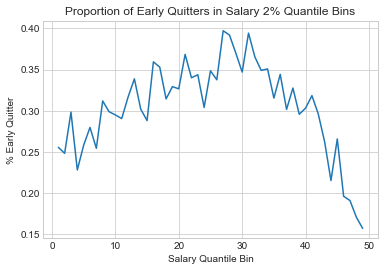

In [150]:
plt.style.use('seaborn-whitegrid')
sns.lineplot(x = prop_early_quitter['salary_quantile'], y = prop_early_quitter['early_quitter'], data = prop_early_quitter)
plt.title("Proportion of Early Quitters in Salary 2% Quantile Bins")
plt.ylabel("% Early Quitter")
plt.xlabel("Salary Quantile Bin")

# Conclusion

Salary is the main reason for early quitter. Roughly speaking, it is more like to quit earlier for employees with salary range of [85,000, 203,000]. So it might be considered to promote or raise the salary during the employee tenure.

Employees with lower or higher salaries, out of range of [85,000, 203,000], are less likely to quit. It might be marketable reason to find a new job or happy to stay with more money.

Employees often leave at their 1-yr anniversaries. It is probably because of year-end bonus, stocks, or a full year work experience even though they do not actually like the new job.